In [1]:
# Laurie
# Import Libraries
import matplotlib
matplotlib.use('TkAgg')
from matplotlib import rc
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
import scipy
from scipy import ndimage
from matplotlib.lines import Line2D
from pylab import *
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
from numpy import histogram2d as histogram2d
from numpy import sqrt, pi, exp, loadtxt
from lmfit import Model
from matplotlib.colors import LogNorm
from matplotlib import contour
from copy import deepcopy

In [2]:
# Regions ID
ID = np.arange(4285)+1

In [3]:
# Regions RA/DEC
regxy = np.loadtxt('Region_xy_centroid_WCS_deg.reg')
RA = regxy[0:4286,0]
DEC = regxy[0:4286,1]

In [4]:
# Regions Radial position
R_GAL = fits.getdata('NGC628_regions_rayons.fits')/1000

In [5]:
# Regions corrected Ha luminosity
flux_tot2= fits.getdata('NGC628_flux_tot_regions2.fits')
lumi2 = flux_tot2*4*3.1415926*(9.006*1000000*3.085678e18)**2 # luminosité
L_Ha_corr = lumi2

In [6]:
# Regions DIG surface brightness
DIG_SB= fits.getdata('NGC628_background.regions2.fits')


In [7]:
# Regions outer limit (or aperture used for the total Ha luminosity)
lim = fits.getdata('NGC628_dimension_regions.fits')

In [8]:
# Regions Categories
cat = fits.getdata('NGC628_regions_category.fits')

In [9]:
# Regions profile fiting parameters
I0 = fits.getdata('NGC628_voigt_I0.fits')
Amp = fits.getdata('NGC628_voigt_amplitude.fits')
sig = fits.getdata('NGC628_voigt_sigma.fits')
alpha = fits.getdata('NGC628_voigt_fraction.fits')
R2 = fits.getdata('NGC628_voigt_correlation_coeff.fits')
R2[(np.isfinite(R2) == False)] = 0
R2 = abs(R2)

In [10]:
# Regions Size
size = fits.getdata('NGC628_regions_size.fits')

In [11]:
# Regions E(B-V)
EBV = fits.getdata('NGC628_regions_EBV_vrai.fits')
EBV_err = fits.getdata('NGC628_regions_EBV_error_vrai.fits')

In [12]:
# Regions line ratios, errors, and SNR_cross
nii2ha = fits.getdata('NGC628.regions.ratio.NIIHa.fits')
enii2ha = fits.getdata('NGC628.regions.ratio.NIIHa.error.fits')
siiha = fits.getdata('NGC628.regions.ratio.SIIHa.fits')
esiiha = fits.getdata('NGC628.regions.ratio.SIIHa.error.fits')
siinii2 = fits.getdata('NGC628.regions.ratio.SIINII.fits')
esiinii2 = fits.getdata('NGC628.regions.ratio.SIINII.error.fits')
oiihb = fits.getdata('NGC628.regions.ratio.OIIHb.fits')
eoiihb = fits.getdata('NGC628.regions.ratio.OIIHb.error.fits')
oiii2hb = fits.getdata('NGC628.regions.ratio.OIIIHb.fits')
eoiii2hb = fits.getdata('NGC628.regions.ratio.OIIIHb.error.fits')
oiii2oiihb = fits.getdata('NGC628.regions.ratio.OIIIOIIHb.fits')
eoiii2oiihb = fits.getdata('NGC628.regions.ratio.OIIIOIIHb.error.fits')
oiii2oii = fits.getdata('NGC628.regions.ratio.OIIIOII.fits')
eoiii2oii = fits.getdata('NGC628.regions.ratio.OIIIOII.error.fits')
oiinii2 = fits.getdata('NGC628.regions.ratio.OIINII.fits')
eoiinii2 = fits.getdata('NGC628.regions.ratio.OIINII.error.fits')
oiii2nii2 = fits.getdata('NGC628.regions.ratio.OIIINII.fits')
eoiii2nii2 = fits.getdata('NGC628.regions.ratio.OIIINII.error.fits')
siisii = fits.getdata('NGC628.regions.ratio.SIISII.fits')
esiisii = fits.getdata('NGC628.regions.ratio.SIISII.error.fits')
snrnii2ha = fits.getdata('NGC628.regions.ratio.NIIHa.snrcross.fits')
snrsiiha = fits.getdata('NGC628.regions.ratio.SIIHa.snrcross.fits')
snrsiinii2 = fits.getdata('NGC628.regions.ratio.SIINII.snrcross.fits')
snroiihb = fits.getdata('NGC628.regions.ratio.OIIHb.snrcross.fits')
snroiii2hb = fits.getdata('NGC628.regions.ratio.OIIIHb.snrcross.fits')
snroiii2oiihb = fits.getdata('NGC628.regions.ratio.OIIIOIIHb.snrcross.fits')
snroiii2oii = fits.getdata('NGC628.regions.ratio.OIIIOII.snrcross.fits')
snroiinii2 = fits.getdata('NGC628.regions.ratio.OIINII.snrcross.fits')
snroiii2nii2 = fits.getdata('NGC628.regions.ratio.OIIINII.snrcross.fits')
snrsiisii = fits.getdata('NGC628.regions.ratio.SIISII.snrcross.fits')

In [13]:
catalog = np.zeros([4285,45])
catalog[0:,0] = ID
catalog[0:,1] = RA
catalog[0:,2] = DEC
catalog[0:,3] = R_GAL
catalog[0:,4] = L_Ha_corr
catalog[0:,5] = DIG_SB
catalog[0:,6] = cat
catalog[0:,7] = I0
catalog[0:,8] = Amp
catalog[0:,9] = sig
catalog[0:,10] =alpha 
catalog[0:,11] =R2 
catalog[0:,12] =size 
catalog[0:,13] =EBV 
catalog[0:,14] =EBV_err 
catalog[0:,15] =nii2ha 
catalog[0:,16] =enii2ha 
catalog[0:,17] =snrnii2ha 
catalog[0:,18] =siiha 
catalog[0:,19] =esiiha 
catalog[0:,20] =snrsiiha 
catalog[0:,21] =siinii2 
catalog[0:,22] =esiinii2 
catalog[0:,23] =snrsiinii2 
catalog[0:,24] =oiii2hb 
catalog[0:,25] =eoiii2hb 
catalog[0:,26] =snroiii2hb 
catalog[0:,27] =oiihb 
catalog[0:,28] =eoiihb 
catalog[0:,29] =snroiihb 
catalog[0:,30] =oiii2oiihb 
catalog[0:,31] =eoiii2oiihb 
catalog[0:,32] =snroiii2oiihb 
catalog[0:,33] =oiii2oii 
catalog[0:,34] =eoiii2oii 
catalog[0:,35] =snroiii2oii 
catalog[0:,36] =oiii2nii2 
catalog[0:,37] =eoiii2nii2 
catalog[0:,38] =snroiii2nii2 
catalog[0:,39] =oiinii2 
catalog[0:,40] =eoiinii2 
catalog[0:,41] =snroiinii2 
catalog[0:,42] =siisii 
catalog[0:,43] =esiisii 
catalog[0:,44] =snrsiisii 


In [14]:
#for i in range(2429,2439):
#    print('% 4.0f' % catalog[i,0]), ('% 2.6f' % catalog[i,1]), ('% 2.6f' % catalog[i,2]), \
#    ('% 2.2f' % catalog[i,3]), ('% 4.2f' % np.log10(catalog[i,4])), ('% 2.2f' % np.log10(catalog[i,5])), \
#    ('% 1.0f' % catalog[i,6]), ('% 4.2f' % np.log10(catalog[i,7])), ('% 2.2f' % np.log10(catalog[i,8])), \
#    ('% 4.2f' % catalog[i,9]), ('% 4.2f' % catalog[i,10]), ('% 4.2f' % catalog[i,11]), ('% 4.2f' % catalog[i,12]), \
#    ('% 4.3f' % catalog[i,13]), ('% 4.3f' % catalog[i,14]), ('% 4.3f' % catalog[i,15]), ('% 4.3f' % catalog[i,16]), \
#    ('% 4.3f' % catalog[i,17]), ('% 4.3f' % catalog[i,18]), ('% 4.3f' % catalog[i,19]), ('% 4.3f' % catalog[i,20]), \
#    ('% 4.3f' % catalog[i,21]), ('% 4.3f' % catalog[i,22]), ('% 4.3f' % catalog[i,23]), ('% 4.3f' % catalog[i,24]), \
#    ('% 4.3f' % catalog[i,25]), ('% 4.3f' % catalog[i,26]), ('% 4.3f' % catalog[i,27]), ('% 4.3f' % catalog[i,28]), \
#    ('% 4.3f' % catalog[i,29]), ('% 4.3f' % catalog[i,30]), ('% 4.3f' % catalog[i,31]), ('% 4.3f' % catalog[i,32]), \
#    ('% 4.3f' % catalog[i,33]), ('% 4.3f' % catalog[i,34]), ('% 4.3f' % catalog[i,35]), ('% 4.3f' % catalog[i,36]), \
#    ('% 4.3f' % catalog[i,37]), ('% 4.3f' % catalog[i,38]), ('% 4.3f' % catalog[i,39]), ('% 4.3f' % catalog[i,40]), \
#    ('% 4.3f' % catalog[i,41]), ('% 4.3f' % catalog[i,42]), ('% 4.3f' % catalog[i,43]), ('% 4.3f' % catalog[i,44]), \

In [15]:
#for i in range(2429,2446):
#    print('% 4.3f' % catalog[i,18]), ('% 4.3f' % catalog[i,19]), ('% 4.3f' % catalog[i,20])

In [306]:
#fits.writeto('NGC628_catalog.fits', catalog)

In [14]:
BOND = np.loadtxt('ex1.dat')

In [15]:
z = 9.0-0.1*np.round(np.arange(21)/2)
i=0
indice = np.where(BOND == z[i])[0]
geomlist=BOND[0:,1]
dephtlist=BOND[0:,0]
agelist=BOND[0:,2]
zlist=BOND[0:,3]
NOlist=BOND[0:,4]
Ulist=BOND[0:,5]
k=[(agelist == 3000000) & (Ulist == -2) & (zlist == z[i]) & (NOlist == 0)]
print BOND[k[0],10]
print len(np.where(k[0] == True)[0])

[ 0.43099648  0.00134773  0.00221912  0.00898357  0.12407864  0.45642379
  0.00375887  0.0046094   0.02067139  0.1908759 ]
10


<IPython.core.display.Javascript object>


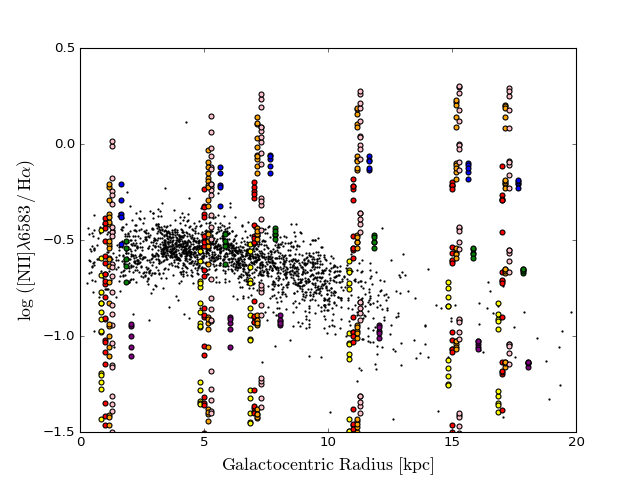

[-0.90457727 -0.86057092 -0.85290426 ..., -1.25477878 -0.87697608
 -0.95317314]
[ 11.41123437  10.9684541   10.79068066 ...,  19.33728906  19.79395117
  17.50232812]
[ 0.04835173  0.03265754  0.05471564 ...,  0.01339429  0.05056138
  0.03066672]
[ 9.2  9.2  9.1  9.1  9.   9.   8.8  8.8  8.7  8.7  8.6  8.6  8.5  8.5  8.4
  8.4  8.2  8.2  8.1  8.1  8. ]


//anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [16]:
 %matplotlib nbagg
ms=5
elinewidth=1


yerr = enii2ha
indice = [(snrnii2ha > 20) & (np.isfinite(nii2ha) == True)]
plt.scatter(R_GAL[indice], nii2ha[indice],s=1, c='k')
print nii2ha[indice]
print R_GAL[indice]
print yerr[indice]

fit = np.polyfit(R_GAL[indice], nii2ha[indice],4)
fitt = np.poly1d(fit)
#plt.plot(np.arange(25),fitt(np.arange(25)), color='k', linewidth=1.5)
#plt.plot(np.arange(25),fitt(np.arange(25))+0.25, '--k')
#plt.plot(np.arange(25),fitt(np.arange(25))-0.25, '--k')
#plt.annotate('y='+'{:04.3f}'.format(fitt[0])+'+'+'{:05.4f}'.format(fitt[1])+'x'+'{:06.5f}'.format(fitt[2])+'x$^2$'+'{:07.6f}'.format(fitt[3])+'x$^3$'+'+'+'{:08.7f}'.format(fitt[4])+'x$^4$', xy=(0.17,0.95),xycoords='axes fraction',\
#            fontsize=10.0, color='k', backgroundcolor='w')
z = np.round(10*(9.2-0.12*np.round(np.arange(21)/2)))/10
print z
for i in range(0,21,2):
    z[i] = 0
no=0
    
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1) & (Ulist == -1) & (zlist == z[i]) & (NOlist == no)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0]))-0.15, np.log10(BOND[k[0],10]), c='yellow')
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1) & (Ulist == -2) & (zlist == z[i]) & (NOlist == no)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0])), np.log10(BOND[k[0],10]), c='r')
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1) & (Ulist == -3) & (zlist == z[i]) & (NOlist == no)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0]))+0.15, np.log10(BOND[k[0],10]), c='orange')
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1)& (Ulist == -4) & (zlist == z[i]) & (NOlist == no)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0]))+0.3, np.log10(BOND[k[0],10]), c='pink')
no=-0.5  
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1) & (Ulist == -1) & (zlist == z[i]) & (NOlist == no)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0]))-0.15, np.log10(BOND[k[0],10]), c='yellow')
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1) & (Ulist == -2) & (zlist == z[i]) & (NOlist == no)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0])), np.log10(BOND[k[0],10]), c='r')
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1) & (Ulist == -3) & (zlist == z[i]) & (NOlist == no)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0]))+0.15, np.log10(BOND[k[0],10]), c='orange')
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1)& (Ulist == -4) & (zlist == z[i]) & (NOlist == no)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0]))+0.3, np.log10(BOND[k[0],10]), c='pink')
no=-1
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1) & (Ulist == -1) & (zlist == z[i]) & (NOlist == no)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0]))-0.15, np.log10(BOND[k[0],10]), c='yellow')
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1) & (Ulist == -2) & (zlist == z[i]) & (NOlist == no)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0])), np.log10(BOND[k[0],10]), c='r')
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1) & (Ulist == -3) & (zlist == z[i]) & (NOlist == no)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0]))+0.15, np.log10(BOND[k[0],10]), c='orange')
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1)& (Ulist == -4) & (zlist == z[i]) & (NOlist == no)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0]))+0.3, np.log10(BOND[k[0],10]), c='pink')
no=-1.5
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1) & (Ulist == -1) & (zlist == z[i]) & (NOlist == no)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0]))-0.15, np.log10(BOND[k[0],10]), c='yellow')
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1) & (Ulist == -2) & (zlist == z[i]) & (NOlist == no)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0])), np.log10(BOND[k[0],10]), c='r')
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1) & (Ulist == -3) & (zlist == z[i]) & (NOlist == no)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0]))+0.15, np.log10(BOND[k[0],10]), c='orange')
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1)& (Ulist == -4) & (zlist == z[i]) & (NOlist == no)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0]))+0.3, np.log10(BOND[k[0],10]), c='pink')
no=-2
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1) & (Ulist == -1) & (zlist == z[i]) & (NOlist == no)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0]))-0.15, np.log10(BOND[k[0],10]), c='yellow')
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1) & (Ulist == -2) & (zlist == z[i]) & (NOlist == no)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0])), np.log10(BOND[k[0],10]), c='r')
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1) & (Ulist == -3) & (zlist == z[i]) & (NOlist == no)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0]))+0.15, np.log10(BOND[k[0],10]), c='orange')
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1)& (Ulist == -4) & (zlist == z[i]) & (NOlist == no)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0]))+0.3, np.log10(BOND[k[0],10]), c='pink')
    
    
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1) & (Ulist == -3) & (zlist == z[i]) & (NOlist == -0.5)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0]))+0.65, np.log10(BOND[k[0],10]), c='b')
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1) & (Ulist == -3) & (zlist == z[i]) & (NOlist == -1)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0]))+0.85, np.log10(BOND[k[0],10]), c='g')
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1) & (Ulist == -3) & (zlist == z[i]) & (NOlist == -1.5)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0]))+1.05, np.log10(BOND[k[0],10]), c='purple')
plt.xlabel('$\mathrm{Galactocentric\,\,Radius\,\,[kpc]}$', fontsize=16, fontname = 'Helvetica')
plt.ylabel('$\mathrm{log\,\,([NII]\lambda6583\,/\,H}$'+r'$\mathrm{\alpha)}$', fontsize=16, fontname = 'Helvetica')
leg = plt.legend(loc='lower left',fontsize=10)
plt.xlim(0,20)
plt.ylim(-1.5,0.5)
plt.show()    


In [17]:
 %matplotlib nbagg
ms=5
elinewidth=1


yerr = enii2ha
indice = [(snroiii2hb > 10) & (np.isfinite(oiii2hb) == True)]
plt.scatter(R_GAL[indice], oiii2hb[indice],s=1, c='k')
print nii2ha[indice]
print R_GAL[indice]
print yerr[indice]

fit = np.polyfit(R_GAL[indice], oiii2hb[indice],4)
fitt = np.poly1d(fit)
#plt.plot(np.arange(25),fitt(np.arange(25)), color='k', linewidth=1.5)
#plt.plot(np.arange(25),fitt(np.arange(25))+0.25, '--k')
#plt.plot(np.arange(25),fitt(np.arange(25))-0.25, '--k')
#plt.annotate('y='+'{:04.3f}'.format(fitt[0])+'+'+'{:05.4f}'.format(fitt[1])+'x'+'{:06.5f}'.format(fitt[2])+'x$^2$'+'{:07.6f}'.format(fitt[3])+'x$^3$'+'+'+'{:08.7f}'.format(fitt[4])+'x$^4$', xy=(0.17,0.95),xycoords='axes fraction',\
#            fontsize=10.0, color='k', backgroundcolor='w')
z = np.round(10*(9.2-0.12*np.round(np.arange(21)/2)))/10
print z
for i in range(0,21,2):
    z[i] = 0
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1) & (Ulist == -1) & (zlist == z[i]) & (NOlist == 0)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0]))-0.15, np.log10(BOND[k[0],9]), c='yellow')
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1) & (Ulist == -2) & (zlist == z[i]) & (NOlist == 0)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0])), np.log10(BOND[k[0],9]), c='r')
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1) & (Ulist == -3) & (zlist == z[i]) & (NOlist == 0)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0]))+0.15, np.log10(BOND[k[0],9]), c='orange')
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1)& (Ulist == -4) & (zlist == z[i]) & (NOlist == 0)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0]))+0.3, np.log10(BOND[k[0],9]), c='pink')
    
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1) & (Ulist == -3) & (zlist == z[i]) & (NOlist == -0.5)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0]))+0.65, np.log10(BOND[k[0],9]), c='b')
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1) & (Ulist == -3) & (zlist == z[i]) & (NOlist == -1)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0]))+0.85, np.log10(BOND[k[0],9]), c='g')
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1) & (Ulist == -3) & (zlist == z[i]) & (NOlist == -1.5)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0]))+1.05, np.log10(BOND[k[0],9]), c='purple')
plt.xlabel('$\mathrm{Galactocentric\,\,Radius\,\,[kpc]}$', fontsize=16, fontname = 'Helvetica')
plt.ylabel('$\mathrm{log\,\,([OIII]\lambda5007\,/\,H}$'+r'$\mathrm{\beta)}$', fontsize=16, fontname = 'Helvetica')
leg = plt.legend(loc='lower left',fontsize=10)
plt.xlim(0,20)
plt.ylim(-4,2)
plt.show()    


<IPython.core.display.Javascript object>

[-0.18057818 -0.18047777 -0.18052631 ..., -0.87697608 -0.95317314
 -0.74774658]
[ 12.40871094  12.85508691  12.45745801 ...,  19.79395117  17.50232812
  22.47312305]
[ 2.75162484  2.75321297  2.75218042 ...,  0.05056138  0.03066672
  0.1273019 ]
[ 9.2  9.2  9.1  9.1  9.   9.   8.8  8.8  8.7  8.7  8.6  8.6  8.5  8.5  8.4
  8.4  8.2  8.2  8.1  8.1  8. ]


<IPython.core.display.Javascript object>


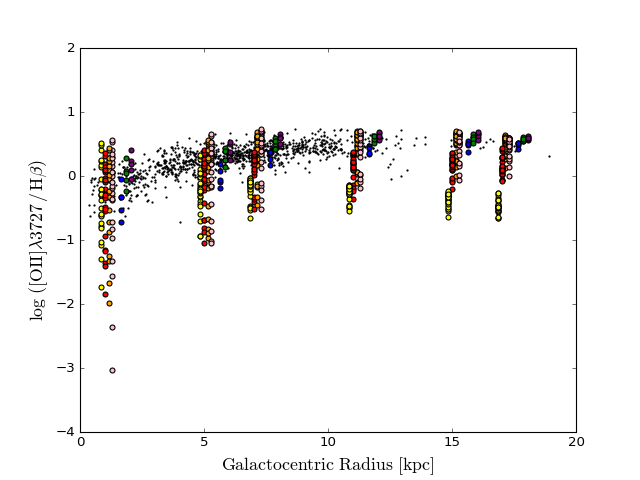

In [270]:
 %matplotlib nbagg
ms=5
elinewidth=1

indice = [(snroiihb > 10) & (np.isfinite(oiihb) == True)]
plt.scatter(R_GAL[indice], oiihb[indice],s=1, c='k')


fit = np.polyfit(R_GAL[indice], oiihb[indice],4)
fitt = np.poly1d(fit)
#plt.plot(np.arange(25),fitt(np.arange(25)), color='k', linewidth=1.5)
#plt.plot(np.arange(25),fitt(np.arange(25))+0.25, '--k')
#plt.plot(np.arange(25),fitt(np.arange(25))-0.25, '--k')
#plt.annotate('y='+'{:04.3f}'.format(fitt[0])+'+'+'{:05.4f}'.format(fitt[1])+'x'+'{:06.5f}'.format(fitt[2])+'x$^2$'+'{:07.6f}'.format(fitt[3])+'x$^3$'+'+'+'{:08.7f}'.format(fitt[4])+'x$^4$', xy=(0.17,0.95),xycoords='axes fraction',\
#            fontsize=10.0, color='k', backgroundcolor='w')
z = np.round(10*(9.2-0.12*np.round(np.arange(21)/2)))/10
for i in range(0,21,2):
    z[i] = 0
no=0
    
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1) & (Ulist == -1) & (zlist == z[i]) & (NOlist == no)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0]))-0.15, np.log10(BOND[k[0],7]), c='yellow')
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1) & (Ulist == -2) & (zlist == z[i]) & (NOlist == no)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0])), np.log10(BOND[k[0],7]), c='r')
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1) & (Ulist == -3) & (zlist == z[i]) & (NOlist == no)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0]))+0.15, np.log10(BOND[k[0],7]), c='orange')
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1)& (Ulist == -4) & (zlist == z[i]) & (NOlist == no)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0]))+0.3, np.log10(BOND[k[0],7]), c='pink')
no=-0.5  
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1) & (Ulist == -1) & (zlist == z[i]) & (NOlist == no)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0]))-0.15, np.log10(BOND[k[0],7]), c='yellow')
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1) & (Ulist == -2) & (zlist == z[i]) & (NOlist == no)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0])), np.log10(BOND[k[0],7]), c='r')
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1) & (Ulist == -3) & (zlist == z[i]) & (NOlist == no)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0]))+0.15, np.log10(BOND[k[0],7]), c='orange')
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1)& (Ulist == -4) & (zlist == z[i]) & (NOlist == no)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0]))+0.3, np.log10(BOND[k[0],7]), c='pink')
no=-1
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1) & (Ulist == -1) & (zlist == z[i]) & (NOlist == no)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0]))-0.15, np.log10(BOND[k[0],7]), c='yellow')
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1) & (Ulist == -2) & (zlist == z[i]) & (NOlist == no)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0])), np.log10(BOND[k[0],7]), c='r')
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1) & (Ulist == -3) & (zlist == z[i]) & (NOlist == no)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0]))+0.15, np.log10(BOND[k[0],7]), c='orange')
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1)& (Ulist == -4) & (zlist == z[i]) & (NOlist == no)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0]))+0.3, np.log10(BOND[k[0],7]), c='pink')
no=-1.5
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1) & (Ulist == -1) & (zlist == z[i]) & (NOlist == no)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0]))-0.15, np.log10(BOND[k[0],7]), c='yellow')
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1) & (Ulist == -2) & (zlist == z[i]) & (NOlist == no)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0])), np.log10(BOND[k[0],7]), c='r')
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1) & (Ulist == -3) & (zlist == z[i]) & (NOlist == no)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0]))+0.15, np.log10(BOND[k[0],7]), c='orange')
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1)& (Ulist == -4) & (zlist == z[i]) & (NOlist == no)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0]))+0.3, np.log10(BOND[k[0],7]), c='pink')
no=-2
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1) & (Ulist == -1) & (zlist == z[i]) & (NOlist == no)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0]))-0.15, np.log10(BOND[k[0],7]), c='yellow')
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1) & (Ulist == -2) & (zlist == z[i]) & (NOlist == no)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0])), np.log10(BOND[k[0],7]), c='r')
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1) & (Ulist == -3) & (zlist == z[i]) & (NOlist == no)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0]))+0.15, np.log10(BOND[k[0],7]), c='orange')
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1)& (Ulist == -4) & (zlist == z[i]) & (NOlist == no)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0]))+0.3, np.log10(BOND[k[0],7]), c='pink')
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1) & (Ulist == -3) & (zlist == z[i]) & (NOlist == -0.5)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0]))+0.65, np.log10(BOND[k[0],7]), c='b')
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1) & (Ulist == -3) & (zlist == z[i]) & (NOlist == -1)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0]))+0.85, np.log10(BOND[k[0],7]), c='g')
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1) & (Ulist == -3) & (zlist == z[i]) & (NOlist == -1.5)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0]))+1.05, np.log10(BOND[k[0],7]), c='purple')
plt.xlabel('$\mathrm{Galactocentric\,\,Radius\,\,[kpc]}$', fontsize=16, fontname = 'Helvetica')
plt.ylabel('$\mathrm{log\,\,([OII]\lambda3727\,/\,H}$'+r'$\mathrm{\beta)}$', fontsize=16, fontname = 'Helvetica')
leg = plt.legend(loc='lower left',fontsize=10)
plt.xlim(0,20)
plt.ylim(-4,2)
plt.show()    


<IPython.core.display.Javascript object>


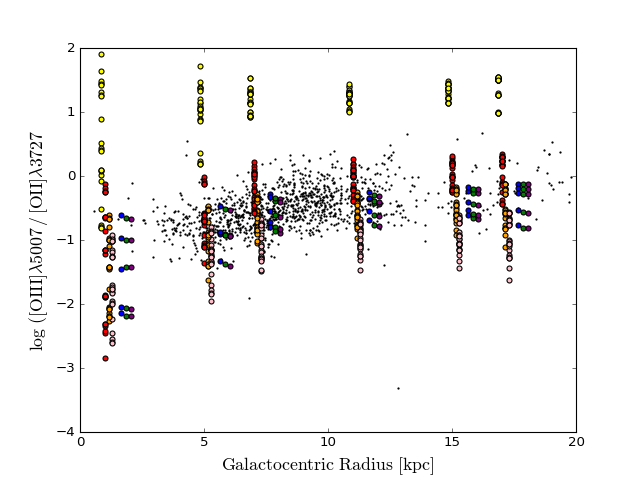

[ 9.2  9.2  9.1  9.1  9.   9.   8.8  8.8  8.7  8.7  8.6  8.6  8.5  8.5  8.4
  8.4  8.2  8.2  8.1  8.1  8. ]


In [277]:
 %matplotlib nbagg
ms=5
elinewidth=1


yerr = enii2ha
indice = [(snroiii2oii > 5) & (np.isfinite(oiii2oii) == True)]
plt.scatter(R_GAL[indice], oiii2oii[indice],s=1, c='k')


fit = np.polyfit(R_GAL[indice], oiii2oii[indice],4)
fitt = np.poly1d(fit)
#plt.plot(np.arange(25),fitt(np.arange(25)), color='k', linewidth=1.5)
#plt.plot(np.arange(25),fitt(np.arange(25))+0.25, '--k')
#plt.plot(np.arange(25),fitt(np.arange(25))-0.25, '--k')
#plt.annotate('y='+'{:04.3f}'.format(fitt[0])+'+'+'{:05.4f}'.format(fitt[1])+'x'+'{:06.5f}'.format(fitt[2])+'x$^2$'+'{:07.6f}'.format(fitt[3])+'x$^3$'+'+'+'{:08.7f}'.format(fitt[4])+'x$^4$', xy=(0.17,0.95),xycoords='axes fraction',\
#            fontsize=10.0, color='k', backgroundcolor='w')
z = np.round(10*(9.2-0.12*np.round(np.arange(21)/2)))/10
print z
no=0
for i in range(0,21,2):
    z[i] = 0
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1) & (Ulist == -1) & (zlist == z[i]) & (NOlist == no)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0]))-0.15, np.log10(BOND[k[0],9]/BOND[k[0],7]), c='yellow')
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1) & (Ulist == -2.5) & (zlist == z[i]) & (NOlist == no)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0])), np.log10(BOND[k[0],9]/BOND[k[0],7]), c='r')
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1) & (Ulist == -3.5) & (zlist == z[i]) & (NOlist == no)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0]))+0.15, np.log10(BOND[k[0],9]/BOND[k[0],7]), c='orange')
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1)& (Ulist == -4) & (zlist == z[i]) & (NOlist == no)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0]))+0.3, np.log10(BOND[k[0],9]/BOND[k[0],7]), c='pink')
no=-0.5
for i in range(0,21,2):
    z[i] = 0
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1) & (Ulist == -1) & (zlist == z[i]) & (NOlist == no)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0]))-0.15, np.log10(BOND[k[0],9]/BOND[k[0],7]), c='yellow')
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1) & (Ulist == -2.5) & (zlist == z[i]) & (NOlist == no)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0])), np.log10(BOND[k[0],9]/BOND[k[0],7]), c='r')
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1) & (Ulist == -3) & (zlist == z[i]) & (NOlist == no)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0]))+0.15, np.log10(BOND[k[0],9]/BOND[k[0],7]), c='orange')
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1)& (Ulist == -3.5) & (zlist == z[i]) & (NOlist == no)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0]))+0.3, np.log10(BOND[k[0],9]/BOND[k[0],7]), c='pink')

no=-1
for i in range(0,21,2):
    z[i] = 0
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1) & (Ulist == -1) & (zlist == z[i]) & (NOlist == no)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0]))-0.15, np.log10(BOND[k[0],9]/BOND[k[0],7]), c='yellow')
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1) & (Ulist == -2.5) & (zlist == z[i]) & (NOlist == no)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0])), np.log10(BOND[k[0],9]/BOND[k[0],7]), c='r')
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1) & (Ulist == -3) & (zlist == z[i]) & (NOlist == no)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0]))+0.15, np.log10(BOND[k[0],9]/BOND[k[0],7]), c='orange')
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1)& (Ulist == -3.5) & (zlist == z[i]) & (NOlist == no)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0]))+0.3, np.log10(BOND[k[0],9]/BOND[k[0],7]), c='pink')
no=-1.5
for i in range(0,21,2):
    z[i] = 0
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1) & (Ulist == -1) & (zlist == z[i]) & (NOlist == no)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0]))-0.15, np.log10(BOND[k[0],9]/BOND[k[0],7]), c='yellow')
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1) & (Ulist == -2.5) & (zlist == z[i]) & (NOlist == no)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0])), np.log10(BOND[k[0],9]/BOND[k[0],7]), c='r')
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1) & (Ulist == -3) & (zlist == z[i]) & (NOlist == no)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0]))+0.15, np.log10(BOND[k[0],9]/BOND[k[0],7]), c='orange')
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1)& (Ulist == -3.5) & (zlist == z[i]) & (NOlist == no)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0]))+0.3, np.log10(BOND[k[0],9]/BOND[k[0],7]), c='pink')
no=-2
for i in range(0,21,2):
    z[i] = 0
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1) & (Ulist == -1) & (zlist == z[i]) & (NOlist == no)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0]))-0.15, np.log10(BOND[k[0],9]/BOND[k[0],7]), c='yellow')
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1) & (Ulist == -2.5) & (zlist == z[i]) & (NOlist == no)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0])), np.log10(BOND[k[0],9]/BOND[k[0],7]), c='r')
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1) & (Ulist == -3) & (zlist == z[i]) & (NOlist == no)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0]))+0.15, np.log10(BOND[k[0],9]/BOND[k[0],7]), c='orange')
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1)& (Ulist == -3.5) & (zlist == z[i]) & (NOlist == no)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0]))+0.3, np.log10(BOND[k[0],9]/BOND[k[0],7]), c='pink')
    
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1) & (Ulist == -3) & (zlist == z[i]) & (NOlist == -0.5)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0]))+0.65, np.log10(BOND[k[0],9]/BOND[k[0],7]), c='b')
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1) & (Ulist == -3) & (zlist == z[i]) & (NOlist == -1)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0]))+0.85, np.log10(BOND[k[0],9]/BOND[k[0],7]), c='g')
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1) & (Ulist == -3) & (zlist == z[i]) & (NOlist == -1.5)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0]))+1.05, np.log10(BOND[k[0],9]/BOND[k[0],7]), c='purple')
plt.xlabel('$\mathrm{Galactocentric\,\,Radius\,\,[kpc]}$', fontsize=16, fontname = 'Helvetica')
plt.ylabel('$\mathrm{log\,\,([OIII]\lambda5007\,/\,[OII]\lambda3727}$', fontsize=16, fontname = 'Helvetica')
leg = plt.legend(loc='lower left',fontsize=10)
plt.xlim(0,20)
plt.ylim(-4,2)
plt.show()    


<IPython.core.display.Javascript object>


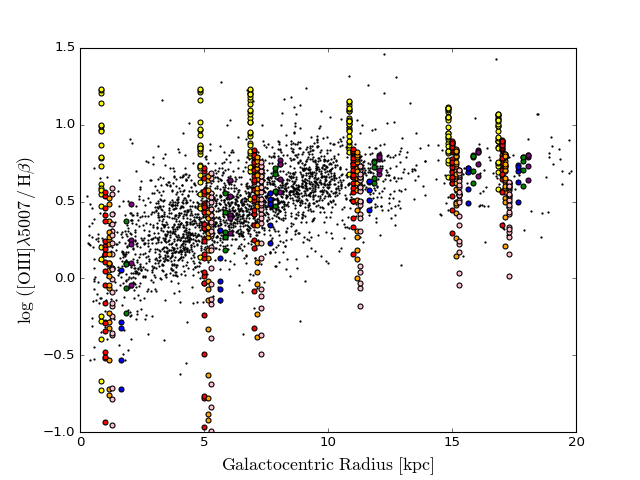

[-0.17901408 -0.18057818 -0.18056777 ..., -0.69980233 -0.95317314
 -0.74774658]
[ 12.74702734  12.40871094  12.10762988 ...,  18.59831836  17.50232812
  22.47312305]
[ 2.77526558  2.75162484  2.75184178 ...,  0.15908904  0.03066672
  0.1273019 ]
[ 9.2  9.2  9.1  9.1  9.   9.   8.8  8.8  8.7  8.7  8.6  8.6  8.5  8.5  8.4
  8.4  8.2  8.2  8.1  8.1  8. ]


In [283]:
 %matplotlib nbagg
ms=5
elinewidth=1


k=3
indice = [(snroiihb > k) & (snroiii2hb > k) & (np.isfinite(oiii2hb) == True)]
plt.scatter(R_GAL[indice], np.log10(10**oiii2hb[indice]+10**oiihb[indice]),s=1, c='k')
print nii2ha[indice]
print R_GAL[indice]
print yerr[indice]

fit = np.polyfit(R_GAL[indice], oiii2hb[indice]+oiihb[indice],4)
fitt = np.poly1d(fit)
#plt.plot(np.arange(25),fitt(np.arange(25)), color='k', linewidth=1.5)
#plt.plot(np.arange(25),fitt(np.arange(25))+0.25, '--k')
#plt.plot(np.arange(25),fitt(np.arange(25))-0.25, '--k')
#plt.annotate('y='+'{:04.3f}'.format(fitt[0])+'+'+'{:05.4f}'.format(fitt[1])+'x'+'{:06.5f}'.format(fitt[2])+'x$^2$'+'{:07.6f}'.format(fitt[3])+'x$^3$'+'+'+'{:08.7f}'.format(fitt[4])+'x$^4$', xy=(0.17,0.95),xycoords='axes fraction',\
#            fontsize=10.0, color='k', backgroundcolor='w')
z = np.round(10*(9.2-0.12*np.round(np.arange(21)/2)))/10
print z
for i in range(0,21,2):
    z[i] = 0
no=0
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1) & (Ulist == -1) & (zlist == z[i]) & (NOlist == no)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0]))-0.15, np.log10(BOND[k[0],9]+BOND[k[0],7]), c='yellow')
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1) & (Ulist == -2) & (zlist == z[i]) & (NOlist == no)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0])), np.log10(BOND[k[0],9]+BOND[k[0],7]), c='r')
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1) & (Ulist == -3) & (zlist == z[i]) & (NOlist == no)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0]))+0.15, np.log10(BOND[k[0],9]+BOND[k[0],7]), c='orange')
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1)& (Ulist == -4) & (zlist == z[i]) & (NOlist == no)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0]))+0.3, np.log10(BOND[k[0],9]+BOND[k[0],7]), c='pink')
no=-0.5
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1) & (Ulist == -1) & (zlist == z[i]) & (NOlist == no)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0]))-0.15, np.log10(BOND[k[0],9]+BOND[k[0],7]), c='yellow')
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1) & (Ulist == -2) & (zlist == z[i]) & (NOlist == no)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0])), np.log10(BOND[k[0],9]+BOND[k[0],7]), c='r')
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1) & (Ulist == -3) & (zlist == z[i]) & (NOlist == no)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0]))+0.15, np.log10(BOND[k[0],9]+BOND[k[0],7]), c='orange')
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1)& (Ulist == -4) & (zlist == z[i]) & (NOlist == no)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0]))+0.3, np.log10(BOND[k[0],9]+BOND[k[0],7]), c='pink')
no=-1
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1) & (Ulist == -1) & (zlist == z[i]) & (NOlist == no)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0]))-0.15, np.log10(BOND[k[0],9]+BOND[k[0],7]), c='yellow')
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1) & (Ulist == -2) & (zlist == z[i]) & (NOlist == no)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0])), np.log10(BOND[k[0],9]+BOND[k[0],7]), c='r')
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1) & (Ulist == -3) & (zlist == z[i]) & (NOlist == no)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0]))+0.15, np.log10(BOND[k[0],9]+BOND[k[0],7]), c='orange')
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1)& (Ulist == -4) & (zlist == z[i]) & (NOlist == no)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0]))+0.3, np.log10(BOND[k[0],9]+BOND[k[0],7]), c='pink')
no=-1.5
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1) & (Ulist == -1) & (zlist == z[i]) & (NOlist == no)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0]))-0.15, np.log10(BOND[k[0],9]+BOND[k[0],7]), c='yellow')
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1) & (Ulist == -2) & (zlist == z[i]) & (NOlist == no)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0])), np.log10(BOND[k[0],9]+BOND[k[0],7]), c='r')
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1) & (Ulist == -3) & (zlist == z[i]) & (NOlist == no)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0]))+0.15, np.log10(BOND[k[0],9]+BOND[k[0],7]), c='orange')
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1)& (Ulist == -4) & (zlist == z[i]) & (NOlist == no)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0]))+0.3, np.log10(BOND[k[0],9]+BOND[k[0],7]), c='pink')
no=-2
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1) & (Ulist == -1) & (zlist == z[i]) & (NOlist == no)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0]))-0.15, np.log10(BOND[k[0],9]+BOND[k[0],7]), c='yellow')
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1) & (Ulist == -2) & (zlist == z[i]) & (NOlist == no)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0])), np.log10(BOND[k[0],9]+BOND[k[0],7]), c='r')
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1) & (Ulist == -3) & (zlist == z[i]) & (NOlist == no)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0]))+0.15, np.log10(BOND[k[0],9]+BOND[k[0],7]), c='orange')
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1)& (Ulist == -4) & (zlist == z[i]) & (NOlist == no)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0]))+0.3, np.log10(BOND[k[0],9]+BOND[k[0],7]), c='pink')    
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1) & (Ulist == -3) & (zlist == z[i]) & (NOlist == -0.5)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0]))+0.65, np.log10(BOND[k[0],9]+BOND[k[0],7]), c='b')
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1) & (Ulist == -3) & (zlist == z[i]) & (NOlist == -1)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0]))+0.85, np.log10(BOND[k[0],9]+BOND[k[0],7]), c='g')
for i in range(0,21):
    k=[(agelist < 5000001) & (geomlist == 0.03) & (dephtlist == 1) & (Ulist == -3) & (zlist == z[i]) & (NOlist == -1.5)]
    plt.scatter(i*np.ones(len(np.where(k[0] == True)[0]))+1.05, np.log10(BOND[k[0],9]+BOND[k[0],7]), c='purple')
plt.xlabel('$\mathrm{Galactocentric\,\,Radius\,\,[kpc]}$', fontsize=16, fontname = 'Helvetica')
plt.ylabel('$\mathrm{log\,\,([OIII]\lambda5007\,/\,H}$'+r'$\mathrm{\beta)}$', fontsize=16, fontname = 'Helvetica')
leg = plt.legend(loc='lower left',fontsize=10)
plt.xlim(0,20)
plt.ylim(-1,1.5)
plt.show()    
